## Spam Detector

Pre-processed data is from https://archive.ics.uci.edu/ml/datasets/Spambase (authors of the data picked 48 different words and the features are 100 * word count / total number of words), while raw data can be found at https://www.kaggle.com/uciml/sms-spam-collection-dataset.

* Naive Bayes (https://pdfs.semanticscholar.org/059c/36439a84c8d51443022352a94e2751c60d1c.pdf)

* Adaboost

### Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [18]:
# preprocessed data 
data = pd.read_csv('spambase.data')
print(data.shape)
data.head()

(4600, 58)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [19]:
# convert data from pandas DataFrame to np array
data = data.as_matrix()

/home/qshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [20]:
# shuffle data and split into train and test sets
np.random.shuffle(data)
X = data[:, :48]
Y = data[:, -1]
X_train, Y_train, X_test,Y_test = X[: -100, ], Y[:-100,], X[-100:, ], Y[-100:, ]

In [30]:
# Naive Bayes model 
model = MultinomialNB()
model.fit(X_train, Y_train)
print('Accuracy rate on test set with naive Bayes: ', model.score(X_test, Y_test))

Accuracy rate on test set with naive Bayes:  0.9


In [31]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.naive_bayes.MultinomialNB instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [42]:
precision_score(Y_test, model.predict(X_test))

0.82

In [43]:
recall_score(Y_test, model.predict(X_test))

0.9761904761904762

In [44]:
f1_score(Y_test, model.predict(X_test))

0.8913043478260869

In [45]:

# fpr, tpr, thresholds = roc_curve(Y_train, model.predict(X_train))
# print(fpr)
# print(tpr)
# def plot_roc_curve(fpr, tpr, label = None):
#     plt.plot(fpr, tpr, linewidth = 2, label = label)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
# plot_roc_curve(fpr, tpr)
# plt.show()

### Adaboost

In [48]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
print('Accuracy rate on test set with AdaBoost: ', model.score(X_test, Y_test))

Accuracy rate on test set with AdaBoost:  0.94


In [49]:
precision_score(Y_test, model.predict(X_test))

0.9090909090909091

In [50]:
recall_score(Y_test, model.predict(X_test))

0.9523809523809523

In [51]:
f1_score(Y_test, model.predict(X_test))

0.9302325581395349

### Naive Bayes on Raw data

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
# TF-IDF count 
from sklearn.feature_extraction.text import TfidfVectorizer
# raw counts 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [58]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Preprocess the data 

In [59]:
data = data.iloc[:, :2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# rename 
data.columns = ['labels', 'text']
# add binary labels 
data['b_labels'] = data['labels'].map({'ham':0, 'spam':1})
data.head()

,labels,text,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
labels      5572 non-null object
text        5572 non-null object
b_labels    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [77]:
#  create X 
tfidf_vectorizer = TfidfVectorizer(decode_error = 'ignore') # ignore invalid utf-8 characters 
X = tfidf_vectorizer.fit_transform(data['text'])

# count_vectorizer = CountVectorizer(decode_error = 'ignore')
X = count_vectorizer.fit_transform(data['text'])

X

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [78]:
# create Y 
Y = data['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [81]:
# model 
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train accuracy: ', model.score(X_train, Y_train))
print('test accuracy: ', model.score(X_test, Y_test))


train accuracy:  0.9635897435897436
test accuracy:  0.9575358851674641


In [82]:
f1_score(Y_test, model.predict(X_test))

0.8106666666666666

#### Visualize 

What are the most common words in ham/spam message?

In [129]:
def visualize(label):
    words = ''
    for msg in data[data['labels'] == label]['text']:
        words += (msg + ' ')
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 150 ** 2
    mask = 255 * mask.astype(int)
    wc = WordCloud(background_color="white", repeat=True, mask=mask)
    wc.generate(words)
#   https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
    plt.imshow(wc)
    plt.axis('off')
    plt.show()


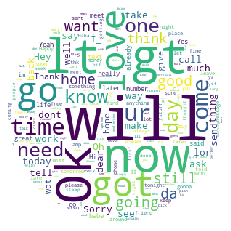

In [130]:
visualize('ham')

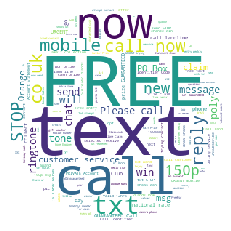

In [131]:
visualize('spam')

In [133]:
## Check the misclassfied msgs 
data['pred'] = model.predict(X)

# msgss should be spam but classified as ham 
sneaky_spam = data[(data['pred'] == 0) & (data['labels'] == 'spam')]['text']

for msg in sneaky_spam:
    print(msg, '\n')

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv 

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL 

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged 

SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV 

Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!  

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!" 

You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again 

FreeMsg

In [138]:
# msgs classified as spam but not 
not_spam = data[(data['pred'] == 1) & (data['labels'] == 'ham')]['text']

for msg in not_spam:
    print(msg)